<a href="https://colab.research.google.com/github/ywan1416/MAT421/blob/main/Module_B_Section_17_4%2C_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrange Polynomial Interpolation

$$ L(x) = \sum_{i=0}^{n} y_i P_i(x) $$

Lagrange Basis Polynomial:

$P_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}$


Lagrange Polynomial Interpolation directly constructs the interpolation polynomial using a formula, ensuring that the polynomial passes through all given data points. However, the computation is complex, especially for a large number of points, making it less efficient for high-degree polynomials.









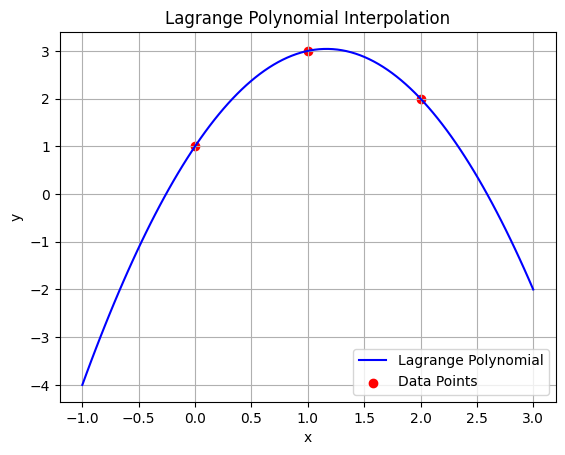

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = np.array([0, 1, 2])
y = np.array([1, 3, 2])

poly = lagrange(x, y)

x_new = np.linspace(-1, 3, 100)
y_new = poly(x_new)

plt.plot(x_new, y_new, label="Lagrange Polynomial", color='b')
plt.scatter(x, y, color='r', label="Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Lagrange Polynomial Interpolation")
plt.grid()
plt.show()


# Newton's Polynomial Interpolation

$$
f(x) = a_0 + a_1 (x - x_0) + a_2 (x - x_0)(x - x_1) + \dots + a_n (x - x_0)(x - x_1) \dots (x - x_{n-1})
$$


Divided Differences

$$
f[x_i, x_{i+1}, \dots, x_{i+k}] = \frac{f[x_{i+1}, \dots, x_{i+k}] - f[x_i, \dots, x_{i+k-1}]}{x_{i+k} - x_i}
$$


Newton’s Polynomial Interpolation is an interpolation method that constructs a polynomial passing through a given set of data points. It utilizes divided differences, allowing for an incremental computation where new data points only require the calculation of additional divided differences, rather than recomputing the entire polynomial. While this method simplifies calculations, high-degree interpolation may lead to numerical instability.

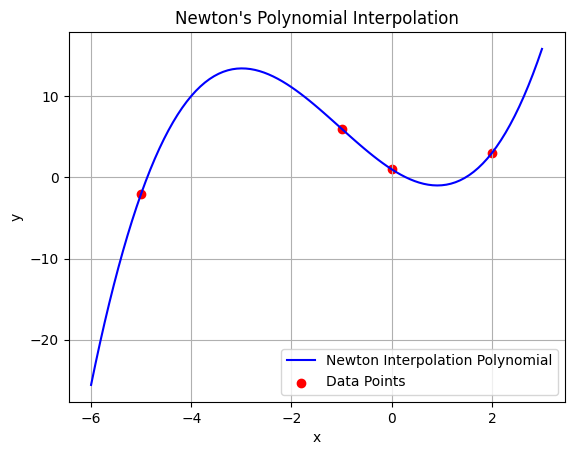

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):
    """Compute the divided differences table"""
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # First column is y-values

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])

    return coef[0, :]  # Return the first row (coefficients)

def newton_poly(coef, x_data, x):
    """Evaluate the Newton interpolation polynomial at x"""
    n = len(x_data) - 1
    p = coef[n]
    for k in range(n - 1, -1, -1):
        p = coef[k] + (x - x_data[k]) * p
    return p

# Given data points
x_data = np.array([-5, -1, 0, 2])
y_data = np.array([-2, 6, 1, 3])

# Compute Newton's divided difference coefficients
coef = divided_diff(x_data, y_data)

# Generate new x values for plotting
x_new = np.linspace(-6, 3, 100)
y_new = newton_poly(coef, x_data, x_new)

# Plot results
plt.plot(x_new, y_new, label="Newton Interpolation Polynomial", color='b')
plt.scatter(x_data, y_data, color='r', label="Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Newton's Polynomial Interpolation")
plt.grid()
plt.show()